In [1]:
import pandas as pd
from textblob import TextBlob

In [2]:
seattle_df = pd.read_csv('seattle_checkouts_gender_signal.tsv', sep="\t")

In [3]:
summary = seattle_df[['Subjects', 'Title', 'Creator', 'Checkouts']]

In [4]:
summary

,Subjects,Title,Creator,Checkouts
0,"Juvenile Fiction, Picture Book Fiction",Nighttime Symphony,Timbaland,2
1,"Fiction, Mystery, Thriller",Cold Kill,Rennie Airth,2
2,"Fiction, Literature",The Choice (Unabridged),Nicholas Sparks,1
3,"New Age, Nonfiction, Self-Improvement",The Master Key System,Charles F. Haanel,3
4,"Juvenile Fiction, Juvenile Literature",The Doughnut King,Jessie Janowitz,12
...,...,...,...,...
89760,"Fiction, Literature",Angle of Repose (Unabridged),Wallace Stegner,8
89761,"Nonfiction, Reference",The Dark Tower Companion: A Guide to Stephen K...,Bev Vincent,1
89762,"Fiction, Historical Fiction, Romance",A Buccaneer at Heart,STEPHANIE LAURENS,1
89763,"Fantasy, Fiction, Paranormal Romance, Romance",Come the Night,Susan Krinard,1


In [5]:
nonfiction = summary[summary['Subjects']=='Nonfiction, Politics']


In [6]:
nonfiction

,Subjects,Title,Creator,Checkouts
325,"Nonfiction, Politics",American Government 101: From the Continental ...,Kathleen Sears,1
617,"Nonfiction, Politics",It's Even Worse Than You Think: What the Trump...,David Cay Johnston,1
734,"Nonfiction, Politics",The People Are Going to Rise Like the Waters U...,Jared Yates Sexton,1
837,"Nonfiction, Politics",A Very Stable Genius: Donald J. Trump's Testin...,Philip Rucker,83
919,"Nonfiction, Politics",How Bernie Won: Inside the Revolution That's T...,Jeff Weaver,1
...,...,...,...,...
88792,"Nonfiction, Politics",Ball of Collusion: The Plot to Rig an Election...,Andrew C. McCarthy,1
88876,"Nonfiction, Politics",Words Will Break Cement: The Passion of Pussy ...,Masha Gessen,1
89241,"Nonfiction, Politics",A Time to Build: From Family and Community to ...,Yuval Levin,4
89543,"Nonfiction, Politics",Triggered: How the Left Thrives on Hate and Wa...,Donald Trump,2


In [7]:
nonfiction.sort_values(by='Checkouts', ascending=False)[:10]

,Subjects,Title,Creator,Checkouts
837,"Nonfiction, Politics",A Very Stable Genius: Donald J. Trump's Testin...,Philip Rucker,83
59736,"Nonfiction, Politics",A Very Stable Genius: Donald J. Trump's Testin...,Philip Rucker,77
29646,"Nonfiction, Politics",American Prison: A Reporter's Undercover Journ...,Shane Bauer,36
55577,"Nonfiction, Politics",Front Row at the Trump Show,Jonathan Karl,32
23989,"Nonfiction, Politics",Front Row at the Trump Show (Unabridged),Jonathan Karl,22
32813,"Nonfiction, Politics",The War on Normal People: The Truth About Amer...,Andrew Yang,20
33459,"Nonfiction, Politics",War on Peace: The End of Diplomacy and the Dec...,Ronan Farrow,19
80455,"Nonfiction, Politics",Strangers in Their Own Land: Anger and Mournin...,Arlie Russell Hochschild,19
21982,"Nonfiction, Politics",The Audacity of Hope: Thoughts on Reclaiming t...,Barack Obama,18
49718,"Nonfiction, Politics",Hiding in Plain Sight: The Invention of Donald...,Sarah Kendzior,16


In [8]:
titlepoli = nonfiction[['Title']]

In [9]:
titlepoli

,Title
325,American Government 101: From the Continental ...
617,It's Even Worse Than You Think: What the Trump...
734,The People Are Going to Rise Like the Waters U...
837,A Very Stable Genius: Donald J. Trump's Testin...
919,How Bernie Won: Inside the Revolution That's T...
...,...
88792,Ball of Collusion: The Plot to Rig an Election...
88876,Words Will Break Cement: The Passion of Pussy ...
89241,A Time to Build: From Family and Community to ...
89543,Triggered: How the Left Thrives on Hate and Wa...


In [10]:
poli_title_blobs = []
for title in titlepoli['Title']:
    poli_title_blobs.append(TextBlob(title))

In [11]:
titlepoli_polarities = []

for title in poli_title_blobs:
    titlepoli_polarities.append(title.polarity)

In [12]:
titlepoli['polarity'] = titlepoli_polarities

/tmp/ipykernel_57/1518396042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titlepoli['polarity'] = titlepoli_polarities


In [13]:
titlepoli

,Title,polarity
325,American Government 101: From the Continental ...,0.0
617,It's Even Worse Than You Think: What the Trump...,-0.4
734,The People Are Going to Rise Like the Waters U...,0.0
837,A Very Stable Genius: Donald J. Trump's Testin...,0.2
919,How Bernie Won: Inside the Revolution That's T...,0.0
...,...,...
88792,Ball of Collusion: The Plot to Rig an Election...,-0.2
88876,Words Will Break Cement: The Passion of Pussy ...,0.0
89241,A Time to Build: From Family and Community to ...,0.0
89543,Triggered: How the Left Thrives on Hate and Wa...,-0.2


In [14]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [15]:
titlepoli

,Title,polarity
325,"American Government 101: From the Continental Congress to the Iowa Caucus, Everything You Need to Know About US Politics",0.000000
617,It's Even Worse Than You Think: What the Trump Administration Is Doing to America,-0.400000
734,The People Are Going to Rise Like the Waters Upon Your Shore: A Story of American Rage (unabridged) (Unabridged),0.000000
837,A Very Stable Genius: Donald J. Trump's Testing of America,0.200000
919,How Bernie Won: Inside the Revolution That's Taking Back Our Country—and Where We Go from Here (unabridged) (Unabridged),0.000000
1000,The Assault on Intelligence: American National Security in an Age of Lies (unabridged) (Unabridged),0.000000
1227,The Year of Voting Dangerously: The Derangement of American Politics (unabridged) (Unabridged),-0.300000
1251,"Become America: Civic Sermons on Love, Responsibility, and Democracy (unabridged) (Unabridged)",0.500000
1470,Republican Like Me: How I Left the Liberal Bubble and Learned to Love the Right,0.261905
2293,The State: Its History and Development Viewed Sociologically,0.000000


In [16]:
titlepoli.sort_values(by='polarity', ascending=False)[:10]

,Title,polarity
75853,"The Great Convergence: Asia, the West, and the Logic of One World (unabridged) (Unabridged)",0.80
37943,Memo to the President Elect: How We Can Restore America's Reputation and Leadership (unabridged) (Unabridged),0.80
37047,The Great Deformation: The Corruption of Capitalism in America (unabridged) (Unabridged),0.80
18465,The Good Immigrant: 26 Writers Reflect on America,0.70
9407,The Good Immigrant: 26 Writers Reflect on America (unabridged) (Unabridged),0.70
81268,Unspeakable: Chris Hedges on the Most Forbidden Topics in America (unabridged) (Unabridged),0.50
1251,"Become America: Civic Sermons on Love, Responsibility, and Democracy (unabridged) (Unabridged)",0.50
58052,Gaslighting America: Why We Love It When Trump Lies to Us (unabridged) (Unabridged),0.50
86594,Dismantling the Empire: America's Last Best Hope (unabridged) (Unabridged),0.50
21450,Who Let the Dogs In?: Incredible Political Animals I Have Known (unabridged) (Unabridged),0.45


In [17]:
titlepoli.sort_values(by='polarity', ascending=True)[:10]

,Title,polarity
15886,Exonerated: The Failed Takedown of President Donald Trump by the Swamp,-0.50
22224,The CIA as Organized Crime: How Illegal Operations Corrupt America and the World (unabridged) (Unabridged),-0.50
3545,Ship of Fools: How a Selfish Ruling Class Is Bringing America to the Brink of Revolution,-0.50
39122,Guilty by Reason of Insanity: Why The Democrats Must Not Win (unabridged) (Unabridged),-0.45
81800,Eyes in the Sky: The Secret Rise of Gorgon Stare and How It Will Watch Us All (unabridged) (Unabridged),-0.40
61645,In the President's Secret Service: Behind the Scenes with Agents in the Line of Fire and the Presidents They Protect (unabridged) (Unabridged),-0.40
12376,"Game Change: Obama and the Clintons, McCain and Palin, and the Race of a Lifetime",-0.40
84365,"Stealing America: What My Experience with Criminal Gangs Taught Me About Obama, Hillary, and the Democratic Party (unabridged) (Unabridged)",-0.40
32874,"Still Broken: A Recruit's Inside Account of Intelligence Failures, from Baghdad to the Pentagon",-0.40
23648,Addicted to Outrage: How Thinking Like a Recovering Addict Can Heal the Country (unabridged) (Unabridged),-0.40


<AxesSubplot:>

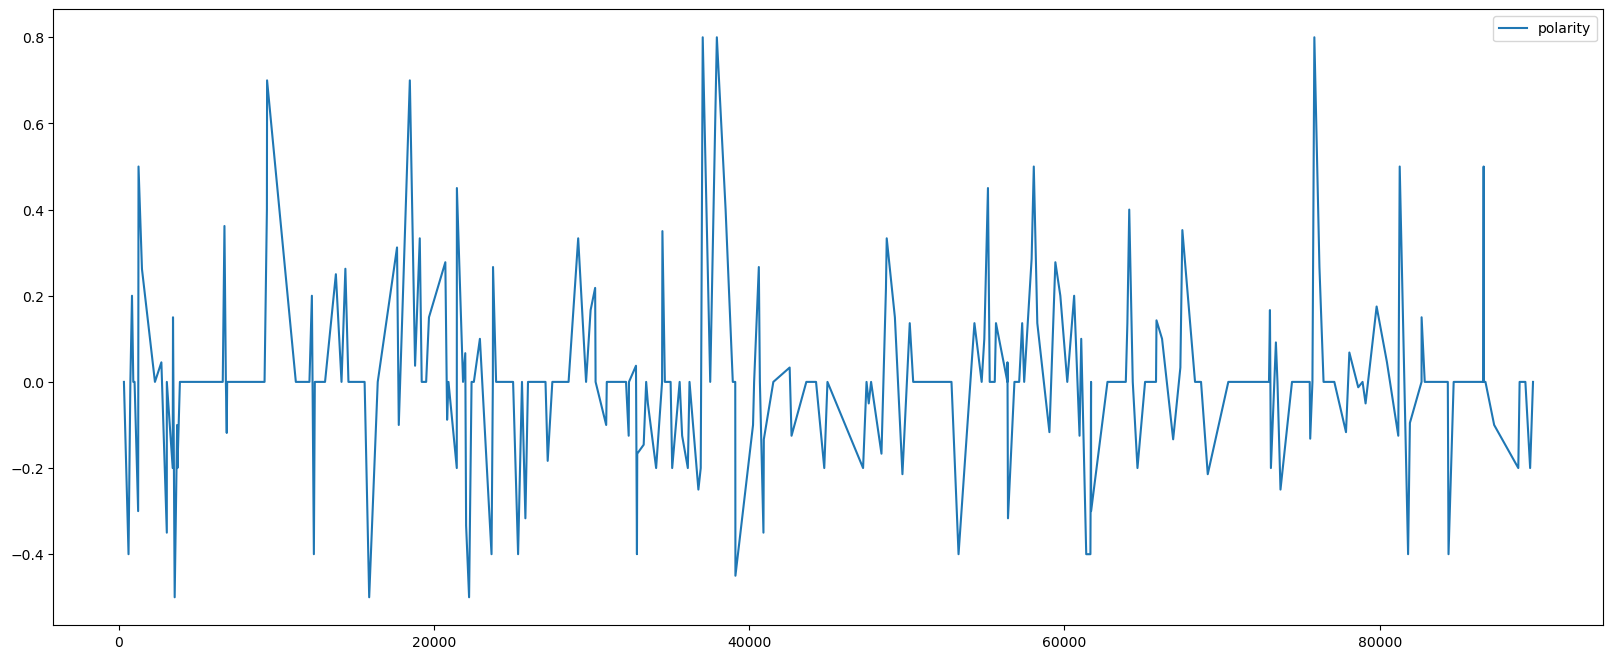

In [18]:
titlepoli[['polarity']].plot(figsize=(20,8))

In [19]:
titlepoli['rolling_10_polarity'] = titlepoli['polarity'].rolling(window=10, center=True).mean()
titlepoli['rolling_50_polarity'] = titlepoli['polarity'].rolling(window=50, center=True).mean()
titlepoli['rolling_100_polarity'] = titlepoli['polarity'].rolling(window=100, center=True).mean()

/tmp/ipykernel_57/3209612076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titlepoli['rolling_10_polarity'] = titlepoli['polarity'].rolling(window=10, center=True).mean()


<AxesSubplot:>

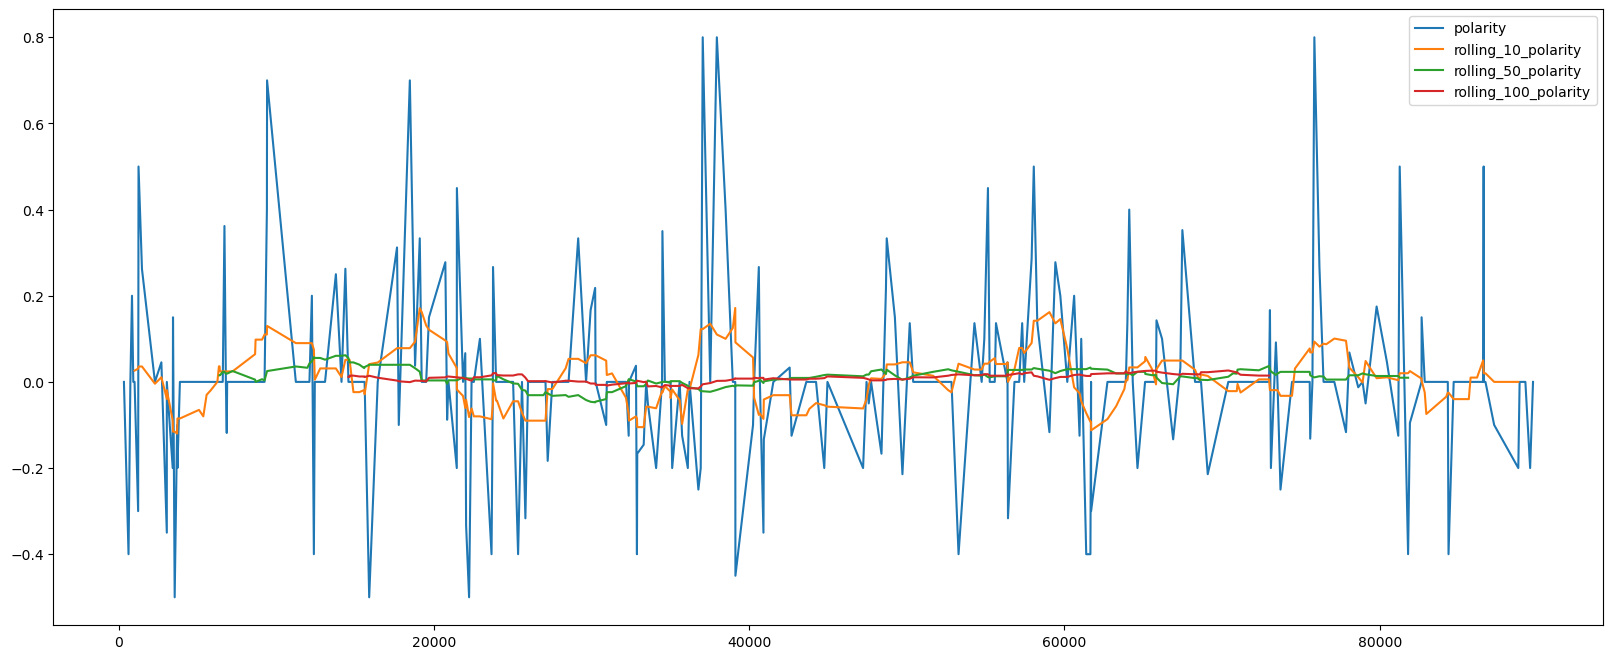

In [20]:
titlepoli[['polarity','rolling_10_polarity','rolling_50_polarity','rolling_100_polarity']].plot(figsize=(20,8))

In [24]:
great = open("greatconvergence.txt", encoding="utf-8").read() # Summary blurb of "The Great Convergence: Asia, the West, and the Logic of One World" taken from Goodreads

great_blob = TextBlob(great)

g_sentences = great_blob.sentences

g_sentences[0].words
" ".join(g_sentences[0].words)

great_sentences = []

for sentence in g_sentences:
     great_sentences.append(" ".join(sentence.words))
        
great_polarities = []

for sentence in g_sentences:
    great_polarities.append(sentence.polarity)
    
great_subjectivities = []

for sentence in g_sentences:
    great_subjectivities.append(sentence.subjectivity)

great_sentence_sentiment_df = pd.DataFrame({
    'sentence': great_sentences,
    'polarity': great_polarities,
    'subjectivity': great_subjectivities
})

In [25]:
great_sentence_sentiment_df

,sentence,polarity,subjectivity
0,The twenty-first century has seen a rise in the global middle class that brings an unprecedented convergence of interests and perceptions cultures and values,0.200000,0.300000
1,Kishore Mahbubani is optimistic,0.000000,0.000000
2,We are creating a new global civilization,0.068182,0.227273
3,Eighty-eight percent of the world 's population outside the West is rising to Western living standards and sharing Western aspirations,0.000000,0.016667
4,Yet Mahbubani one of the most perceptive global commentators also warns that a new global order needs new policies and attitudes,0.154545,0.281818
5,Policymakers all over the world must change their preconceptions and accept that we live in one world,0.136364,0.500000
6,National interests must be balanced with global interests,0.000000,0.000000
7,Power must be shared,0.000000,0.000000
8,The U.S and Europe must cede some power,0.000000,0.000000
9,China and India Africa and the Islamic world must be integrated,0.000000,0.000000


In [26]:
great = nonfiction[nonfiction['Title']=='The Great Convergence: Asia, the West, and the Logic of One World (unabridged) (Unabridged)']

In [27]:
great

,Subjects,Title,Creator,Checkouts
75853,"Nonfiction, Politics","The Great Convergence: Asia, the West, and the Logic of One World (unabridged) (Unabridged)",Kishore Mahbubani,2


In [28]:
june_df = pd.read_csv('june.tsv', sep="\t") # for June 2020 checkout dataset

june_title = june_df[['Title']]

june_title_blobs = []
for title in june_title['Title']:
    june_title_blobs.append(TextBlob(title))
    
june_polarities = []

for title in june_title_blobs:
    june_polarities.append(title.polarity)

june_title['polarity'] = june_polarities

/tmp/ipykernel_57/1826914401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june_title['polarity'] = june_polarities


In [29]:
june_title

,Title,polarity
0,You're More Powerful Than You Think: A Citizen's Guide to Making Change Happen (unabridged) (Unabridged),0.400000
1,"The Great Debate: Edmund Burke, Thomas Paine, and the Birth of Right and Left (unabridged) (Unabridged)",0.361905
2,People Get Ready: The Fight Against a Jobless Economy and a Citizenless Democracy,0.200000
3,C Street: The Fundamentalist Threat to American Democracy (unabridged) (Unabridged),0.000000
4,Black Flags: The Rise of ISIS (unabridged) (Unabridged),-0.166667
5,A Very Stable Genius: Donald J. Trump's Testing of America (unabridged) (Unabridged),0.200000
6,The Plot to Hack America: How Putin's Cyberspies and Wikileaks Tried to Steal the 2016 Election (unabridged) (Unabridged),0.000000
7,Thin Blue Lie: The Failure of High-Tech Policing,-0.238889
8,The Roots of Obama's Rage (Unabridged),0.000000
9,Socialism Sucks: Two Economists Drink Their Way Through the Unfree World (unabridged) (Unabridged),-0.300000


<AxesSubplot:>

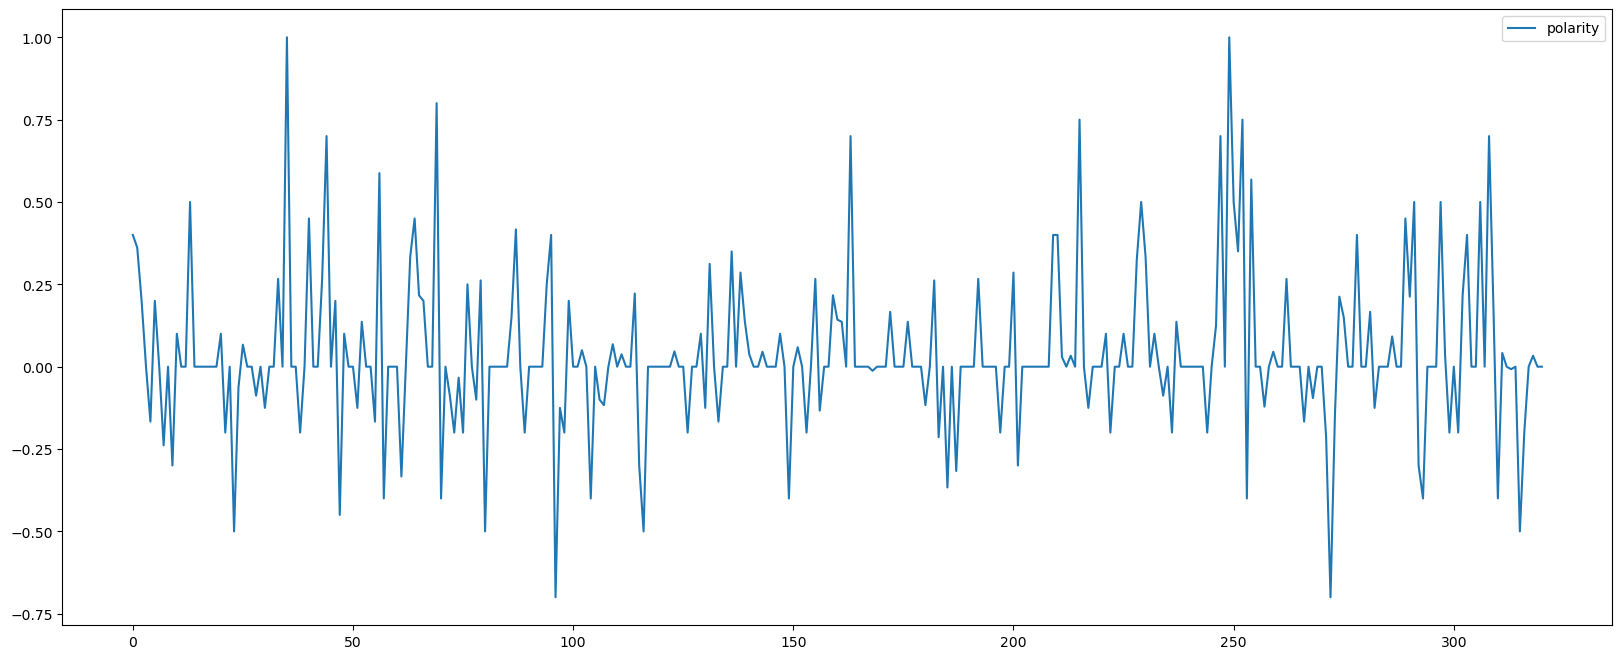

In [30]:
june_title[['polarity']].plot(figsize=(20,8))

In [31]:
june_title['rolling_10_polarity'] = june_title['polarity'].rolling(window=10, center=True).mean()
june_title['rolling_50_polarity'] = june_title['polarity'].rolling(window=50, center=True).mean()
june_title['rolling_100_polarity'] = june_title['polarity'].rolling(window=100, center=True).mean()

/tmp/ipykernel_57/193092600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june_title['rolling_10_polarity'] = june_title['polarity'].rolling(window=10, center=True).mean()
/tmp/ipykernel_57/193092600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june_title['rolling_50_polarity'] = june_title['polarity'].rolling(window=50, center=True).mean()
/tmp/ipykernel_57/193092600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

<AxesSubplot:>

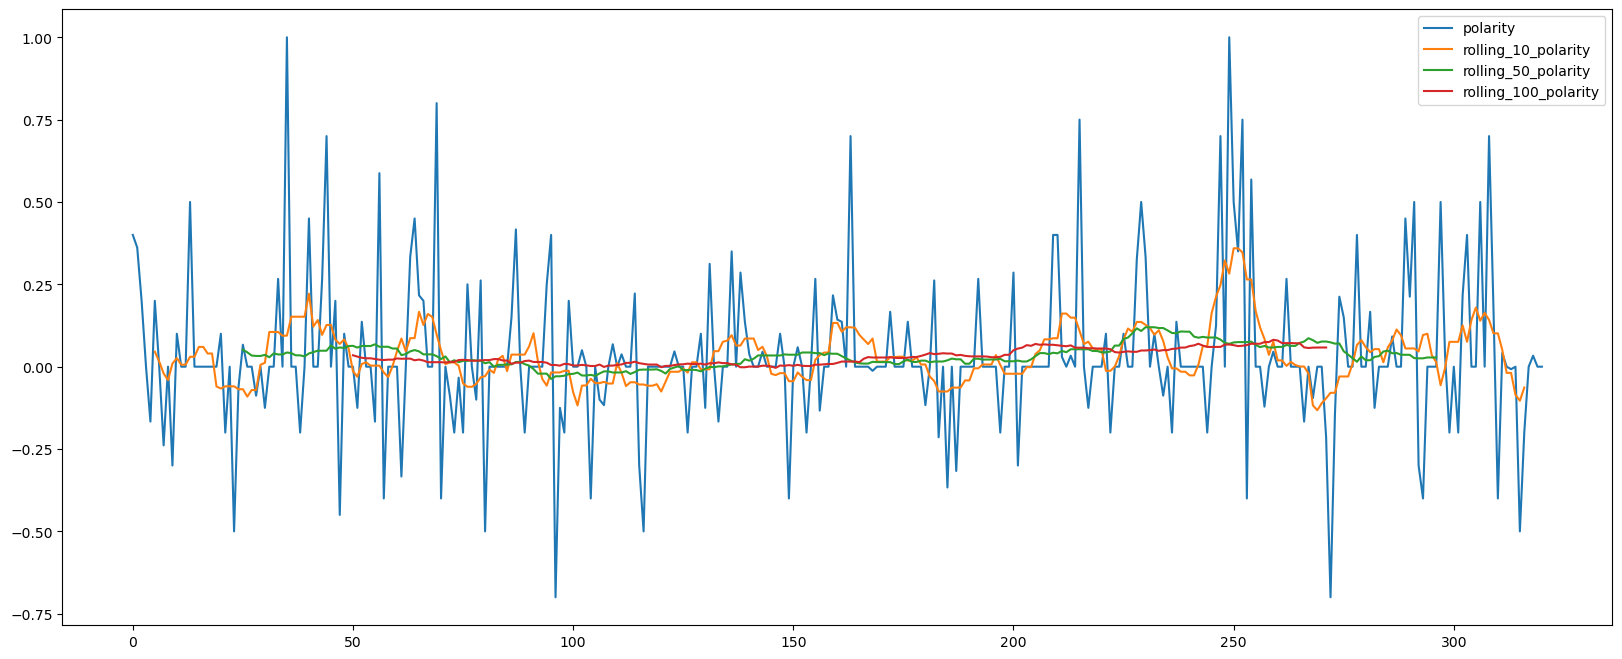

In [32]:
june_title[['polarity','rolling_10_polarity','rolling_50_polarity','rolling_100_polarity']].plot(figsize=(20,8))

In [33]:
june_title.sort_values(by='polarity', ascending=True)[:10]

,Title,polarity,rolling_10_polarity,rolling_50_polarity,rolling_100_polarity
96,United States of Socialism: Who's Behind It. Why It's Evil. How to Stop It. (unabridged) (Unabridged),-0.70,-0.017500,-0.029128,0.005144
272,United States of Socialism: Who's Behind It. Why It's Evil. How to Stop It.,-0.70,-0.079286,0.073908,NaN
116,The CIA as Organized Crime: How Illegal Operations Corrupt America and the World (unabridged) (Unabridged),-0.50,-0.054028,-0.008746,0.008538
80,"Guilty: Liberal ""Victims"" and Their Assault on America",-0.50,-0.028810,0.010397,0.019972
23,Ship of Fools: How a Selfish Ruling Class Is Bringing America to the Brink of Revolution,-0.50,-0.059583,NaN,NaN
315,The Declaration of Independents: How Libertarian Politics Can Fix What's Wrong with America,-0.50,-0.103258,NaN,NaN
47,Guilty by Reason of Insanity: Why The Democrats Must Not Win (unabridged) (Unabridged),-0.45,0.069167,0.058470,NaN
293,"Stealing America: What My Experience with Criminal Gangs Taught Me About Obama, Hillary, and the Democratic Party (unabridged) (Unabridged)",-0.40,0.096250,0.025396,NaN
253,"Still Broken: A Recruit's Inside Account of Intelligence Failures, from Baghdad to the Pentagon",-0.40,0.264697,0.074628,0.065695
70,Everything Trump Touches Dies: A Republican Strategist Gets Real About the Worst President Ever,-0.40,0.049545,0.023124,0.013671


In [34]:
june_title.sort_values(by='polarity', ascending=False)[:10]

,Title,polarity,rolling_10_polarity,rolling_50_polarity,rolling_100_polarity
35,Finks: How the C.I.A. Tricked the World's Best Writers,1.0000,0.094167,0.043136,NaN
249,Sold Out: How High-Tech Billionaires & Bipartisan Beltway Crapweasels Are Screwing America's Best & Brightest Workers (unabridged) (Unabridged),1.0000,0.282500,0.069378,0.067385
69,"The Great Convergence: Asia, the West, and the Logic of One World (unabridged) (Unabridged)",0.8000,0.097879,0.032124,0.013671
252,A More Perfect Union: What We the People Can Do to Reclaim Our Constitutional Liberties,0.7500,0.346818,0.074628,0.063528
215,A More Perfect Union: What We the People Can Do to Reclaim Our Constitutional Liberties (unabridged) (Unabridged),0.7500,0.108810,0.052946,0.057695
44,The Wise Men Know What Wicked Things Are Written on the Sky (Unabridged),0.7000,0.126667,0.048470,NaN
308,The Good Immigrant: 26 Writers Reflect on America,0.7000,0.142024,NaN,NaN
247,The Good Immigrant: 26 Writers Reflect on America (unabridged) (Unabridged),0.7000,0.247500,0.082294,0.060010
163,The Tyranny of Good Intentions: How Prosecutors and Law Enforcement Are Trampling the Constitution in the Name of Justice,0.7000,0.119589,0.018630,0.015527
56,"Cracking the Code: How to Win Hearts, Change Minds, and Restore America's Original Vision",0.5875,0.003220,0.060458,0.021170
